In [17]:
%matplotlib notebook
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt

In [18]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.family'] = 'serif'

golden_ratio  = (np.sqrt(5) - 1.0) / 2.0  # because it looks good
figWidth = 3.37
mpl.rcParams['figure.figsize'] = figWidth, figWidth * 0.75

### EDX spectrum

In [19]:
adc, intensity = np.genfromtxt('imx291_tube_spectrum_6keV_320uA_gain_213.txt').T

In [20]:
scale = 2696/71.

<IPython.core.display.Javascript object>


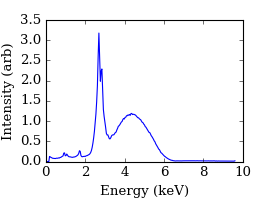

In [28]:
from matplotlib.ticker import MaxNLocator
fig = plt.figure()
ax = fig.add_subplot(111)

my_locator = MaxNLocator(5)
tick_formatter = mpl.ticker.ScalarFormatter()
tick_formatter.set_scientific(True)
tick_formatter.set_powerlimits((-2, 2))

ax.set_xlabel('Energy (keV)')
ax.set_ylabel('Intensity (arb)')
fig.subplots_adjust(bottom=0.2)
fig.subplots_adjust(left=0.17)


ax.plot(adc * scale / 1000, intensity/10000)

ax.yaxis.set_major_formatter(tick_formatter)
fig.savefig('edx.svg', dpi = 300, bbox_inches='tight')

In [144]:
plt.plot(adc * scale / 1000, intensity)

# QE plot (from Camera_QE_Result.nb)

In [175]:
energies, qes = list(zip([8.047, 5], [6.404, 21], [4.511, 24], [2.308, 60]))
xlabel = 'Energy (keV)'
ylabel = 'QE (%)'

In [176]:
def scatter_error(x, y, yerr, xlabel = '', ylabel = '', name = 'plot.png'):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.gcf().subplots_adjust(bottom=0.19)
    plt.gcf().subplots_adjust(left=0.17)
    plt.errorbar(x, y, yerr=yerr, marker = 'o', linestyle = '', label = 'label')
    plt.savefig(name, dpi = 300, bbox_inches='tight')

In [177]:
scatter_error(energies, qes, np.array(qes)/10., xlabel, ylabel, name = 'imx290_qe.png')